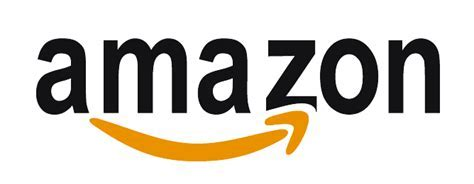

# <span style="color: cyan;">Amazon Sales Analysis </span>

## <span style="color: cyan;">🔖Objective </span>

The primary objective of this project is to analyze Amazon sales data to uncover insights and trends that can drive strategic decision-making. The analysis will focus on understanding sales performance across different regions, countries, and item types, as well as evaluating the impact of various factors such as sales channels, order priority, and shipping times on overall sales, revenue, costs, and profit.

## <span style="color: cyan;">🔖Data Overview </span>

**The dataset comprises several key features, each contributing to a comprehensive view of Amazon's sales operations. Below is a description of each feature:**



- **Region**: The geographical region where the sale occurred.
- **Country**: The specific country within the region where the order was placed.
- **Item Type**: The category of the item sold (e.g., electronics, clothing, etc.).
- **Sales Channel**: The medium through which the sale was made (e.g., online, offline).
- **Order Priority**: The priority level of the order (e.g., high, medium, critical, low).
- **Order Date**: The date when the order was placed.
- **Order ID**: A unique identifier for the order.
- **Ship Date**: The date when the order was shipped.
- **Units Sold**: The number of units sold in the order.
- **Unit Price**: The price per unit of the item sold.
- **Unit Cost**: The cost per unit of the item sold.
- **Total Revenue**: The total revenue generated from the order (calculated as Units Sold * Unit Price).
- **Total Cost**: The total cost incurred for the order (calculated as Units Sold * Unit Cost).
- **Total Profit**: The total profit earned from the order (calculated as Total Revenue - Total Cost). 

## <span style="color: cyan;">🔖Import Libraries </span>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

## <span style="color: cyan;">🔖Exploring the Dataset </span>

In [22]:
df=pd.read_csv("Amazon Sales data.csv")

In [23]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [24]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


> ***Note*** - The Dataset contains 100 records with 5 Categorical variables and 6 Numerical variables with "Order Date" & "Ship Date" likely represents the Dates.

In [26]:
round(df.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
Order ID,100.0,555020412.4,260615257.1,114606559.0,338922488.0,557708561.0,790755080.8,994022214.0
Units Sold,100.0,5128.7,2794.5,124.0,2836.2,5382.5,7369.0,9925.0
Unit Price,100.0,276.8,235.6,9.3,81.7,179.9,437.2,668.3
Unit Cost,100.0,191.0,188.2,6.9,35.8,107.3,263.3,525.0
Total Revenue,100.0,1373487.7,1460028.7,4870.3,268721.2,752314.4,2212044.7,5997055.0
Total Cost,100.0,931805.7,1083938.3,3612.2,168868.0,363566.4,1613869.7,4509794.0
Total Profit,100.0,441682.0,438537.9,1258.0,121443.6,290768.0,635828.8,1719922.0


In [27]:
df.describe(include='object').T

,count,unique,top,freq
Region,100,7,Sub-Saharan Africa,36
Country,100,76,The Gambia,4
Item Type,100,12,Clothes,13
Sales Channel,100,2,Offline,50
Order Priority,100,4,H,30
Order Date,100,100,5/28/2010,1
Ship Date,100,99,11/17/2010,2


In [28]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [29]:
df.duplicated().sum()

0

## <span style="color: cyan;">🔖Exploratory Data Analysis</span>

In [30]:
#Separating the features into categorical and numerical
nums=[col for col in df.columns if df[col].dtype!="O"]
cats=[col for col in df.columns if df[col].dtype=="O"]

In [31]:
df[cats].head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013


In [32]:
df[nums].head()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36
2,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82
4,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### <span style="color: cyan;">🔖Univariate Analysis</span>

In [33]:
#Defining functions for plots
def Histplot(col, df,binsize):
    plt.figure(figsize=(10,5))
    sns.set_style("white")
    sns.histplot(df[col],bins=binsize,edgecolor='black', kde=True, color='skyblue').lines[0].set_color('red')
    plt.title(f'Distribution of {col}',color='brown')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

def Boxplot(nums,df):
    fig,axes=plt.subplots(nrows=1,ncols=len(nums[1:]),figsize=(20,8))
    for i, nums in enumerate(nums[1:]):
        sns.boxplot(y=df[nums],ax=axes[i],color='skyblue')
        axes[i].set_title(nums,color="red")
    plt.tight_layout()
    plt.show()

def Countplot(col,df,height,width):
    plt.figure(figsize=(height,width))
    ax=sns.countplot(y=df[col],palette="winter",order=df[col].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Countplot of {col}',color='r',fontsize=16)
    plt.show()


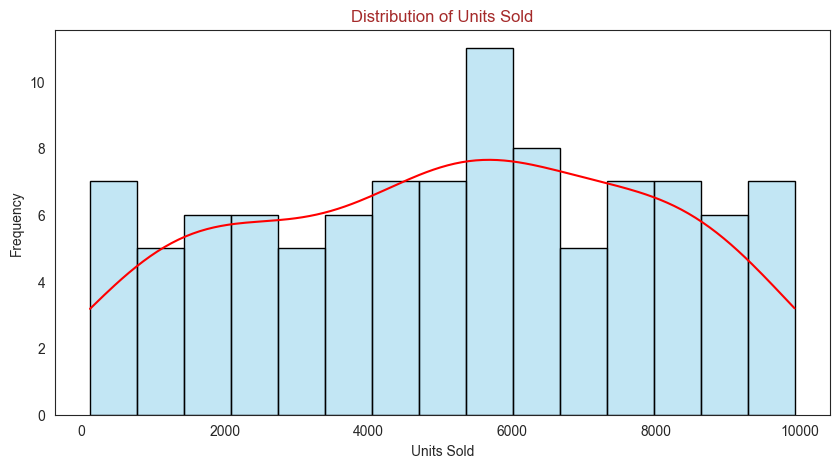

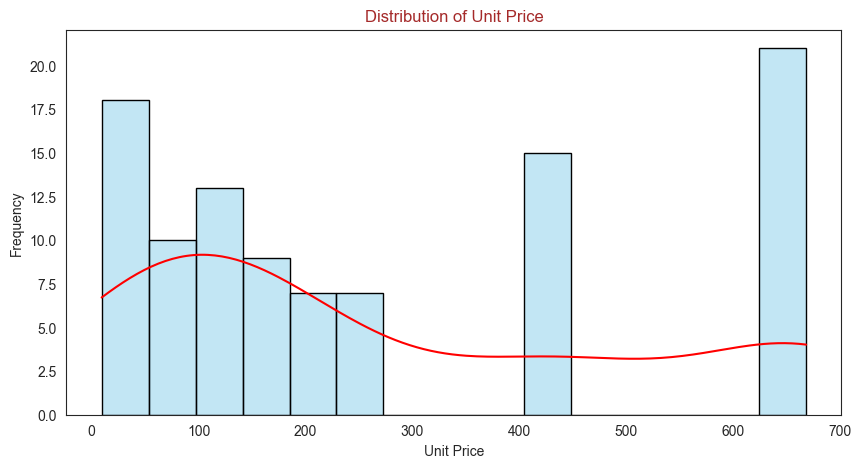

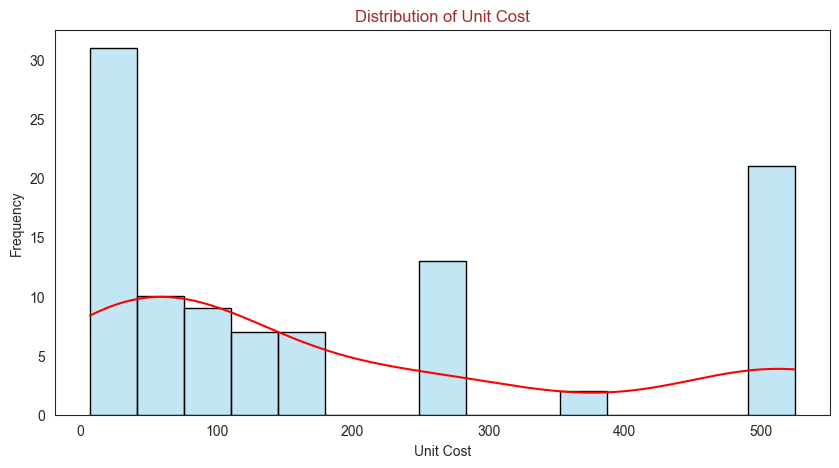

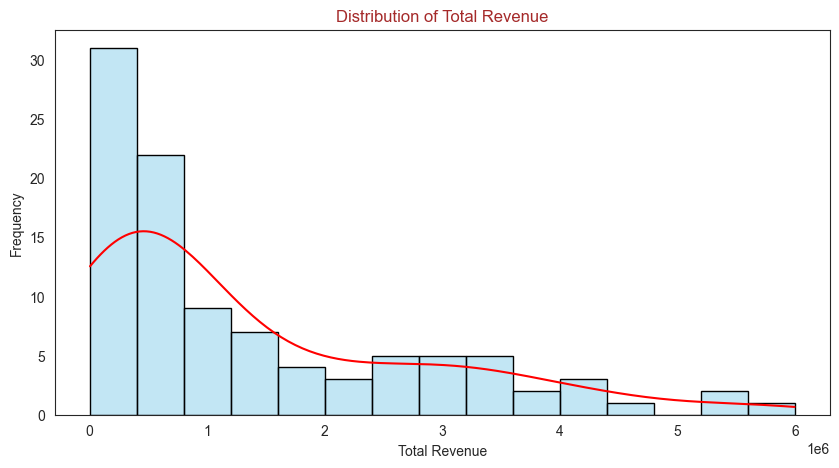

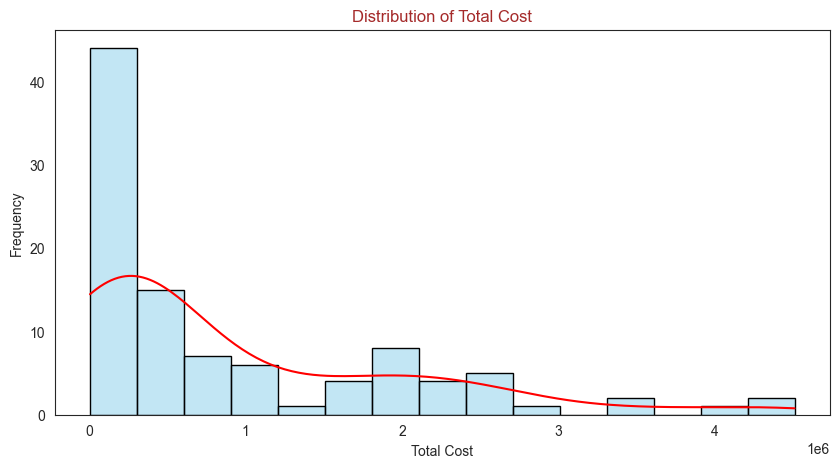

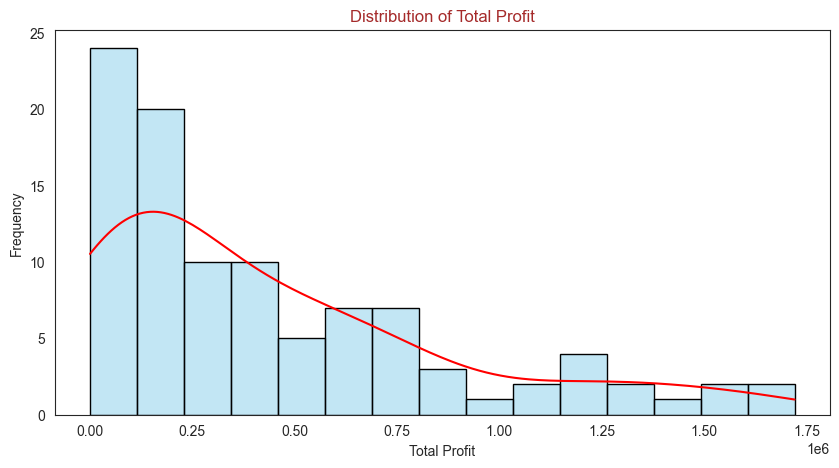

In [34]:
#Visualizing the Distrbution of Numerical features
for cols in nums[1:]:
    Histplot(cols,df,15)
    plt.show()

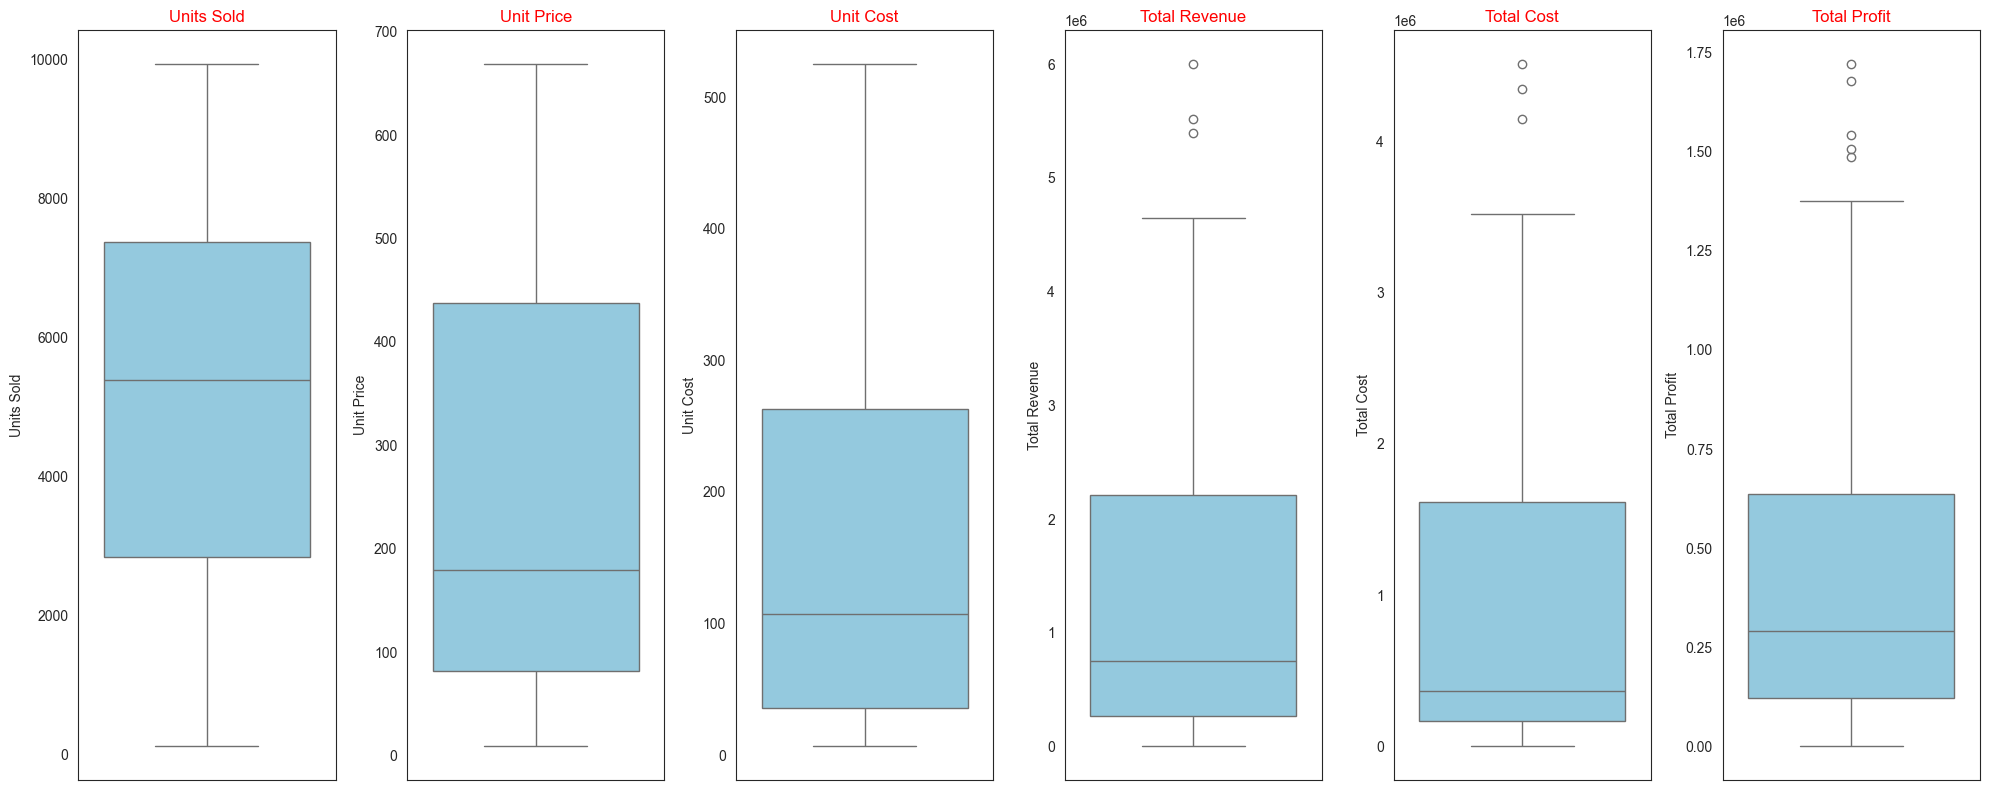

In [35]:
#Visualizing the Boxplot of Features
Boxplot(nums,df)

> ***Note*** 

- The median units sold is approximately 6000, with a relatively symmetrical distribution and no outliers.
- Unit price has a median of about 300, showing significant variability but no outliers, and a symmetrical distribution.
- Unit cost, with a median of around 100, also displays significant variability, a symmetrical distribution, and no outliers.
- Total revenue has a median of approximately 2,000,000, is right-skewed, and includes high-value outliers.
- Total cost, with a median near 1,000,000, is similarly right-skewed and has several high-value outliers.
- Total profit shows a median of about 250,000, is right-skewed, and contains notable high-value outliers, indicating instances of exceptionally high profits.

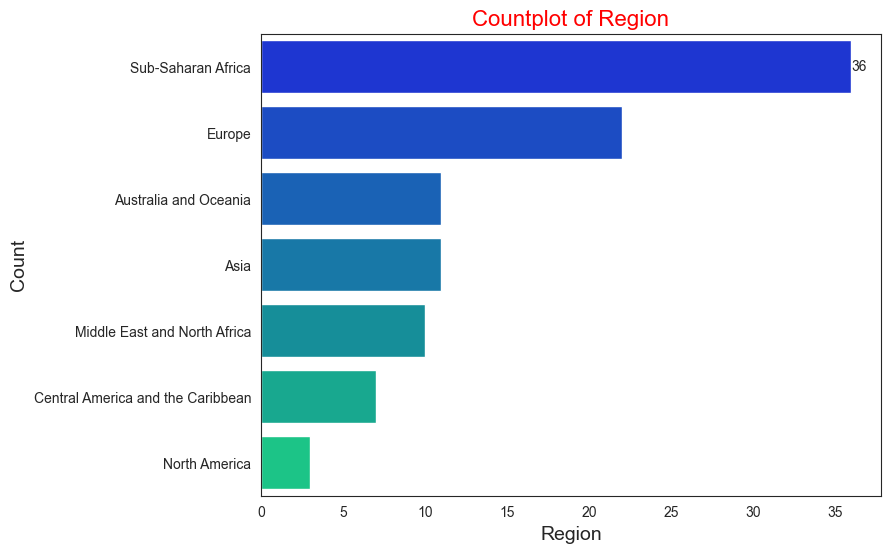

In [36]:
Countplot("Region",df,8,6)

> ***Note***
- The majority of the orders come from Sub-Saharan Africa and Europe.
- North America contributes the least to Amazon's orders.

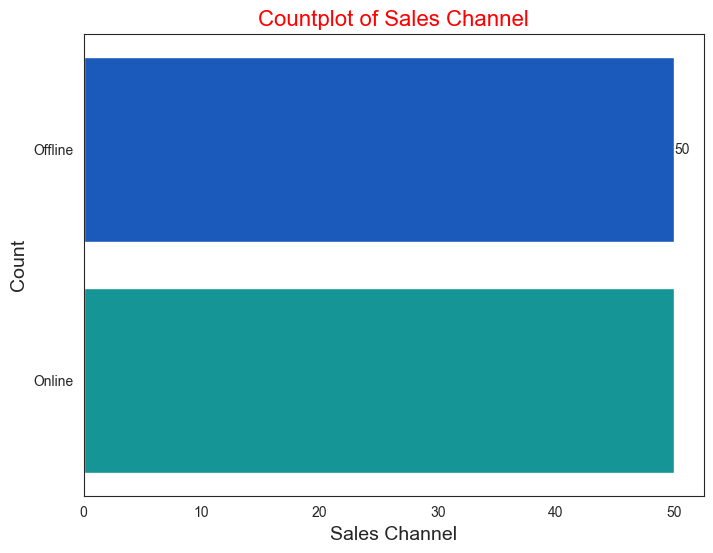

In [37]:
Countplot("Sales Channel",df,8,6)

> ***Note***
- The number of orders placed through offline and online sales channels is equal, each accounting for 50%.

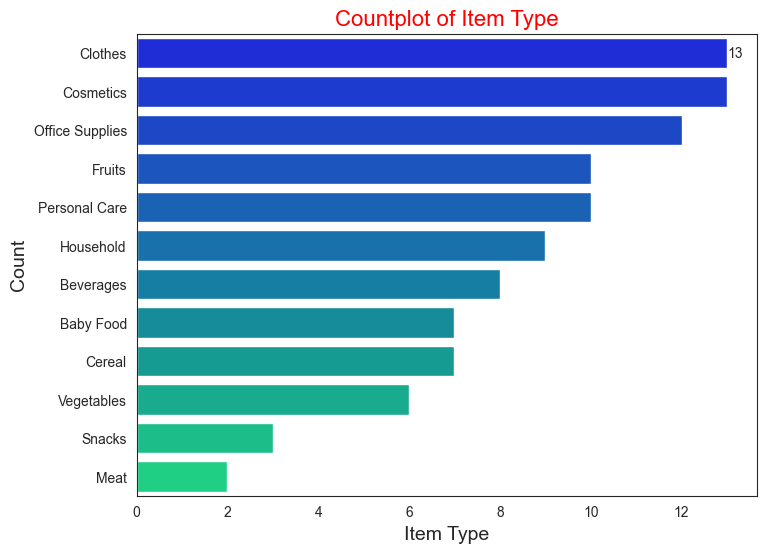

In [38]:
Countplot("Item Type",df,8,6)

> ***Notes***
- Clothes: The highest count of items belongs to the Clothes category, with a total of 13 items.
- The snacks and meat categories have fewer products.

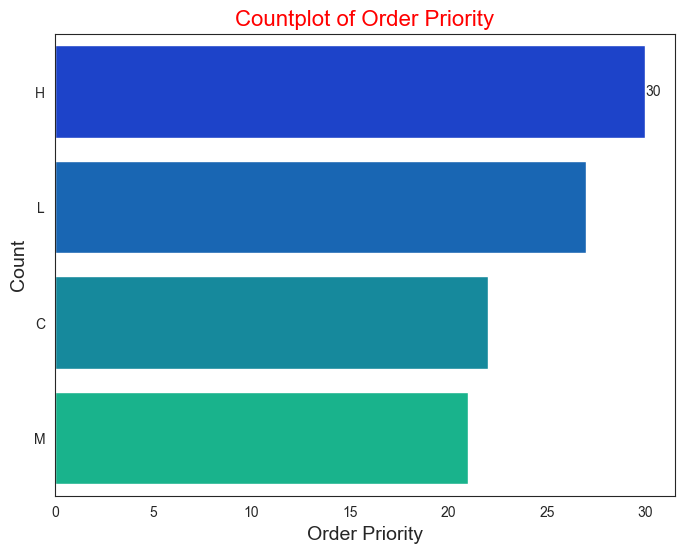

In [39]:
Countplot('Order Priority',df,8,6)

> ***Notes***
- The distribution of orders across priority levels—high, low, medium, and critical—is roughly equal.